In [2]:
import os
import random
import sys
sys.path.append(os.pardir)

import geopandas as gpd
from matplotlib import pyplot as plt
import shapely
from shapely.plotting import plot_points
from shapely.plotting import plot_line
from shapely.plotting import plot_polygon

from apps.disassembly import geom_disassembly

In [22]:
# data source
main_square = [
    shapely.Point(0, 0),
    shapely.Point(10, 0),
    shapely.Point(10, 10),
    shapely.Point(0, 10),
]
inner_square_1 = [
    shapely.Point(1, 1),
    shapely.Point(3, 1),
    shapely.Point(3, 3),
    shapely.Point(1, 3),
]
inner_square_2 = [
    shapely.Point(5, 5),
    shapely.Point(7, 5),
    shapely.Point(7, 7),
    shapely.Point(5, 7),
]
outer_square = [
    shapely.Point(11, 0),
    shapely.Point(15, 0),
    shapely.Point(15, 15),
    shapely.Point(11, 15),
]
outer_within = [
    shapely.Point(12, 1),
    shapely.Point(14, 1),
    shapely.Point(14, 14),
    shapely.Point(12, 14),
]
# geometries
points = shapely.MultiPoint(main_square)
line = shapely.LineString(main_square)
multi_line = shapely.MultiLineString([main_square, inner_square_1])
poly = shapely.Polygon(main_square)
inner_poly1 = shapely.Polygon(inner_square_1)
inner_poly2 = shapely.Polygon(inner_square_2)
outer_poly = shapely.Polygon(outer_square)
outer_within_poly = shapely.Polygon(outer_within)
multi_poly = (
    shapely
    .MultiPolygon([poly, outer_poly])
    .difference(inner_poly1)
    .difference(inner_poly2)
    .difference(outer_within_poly)
)

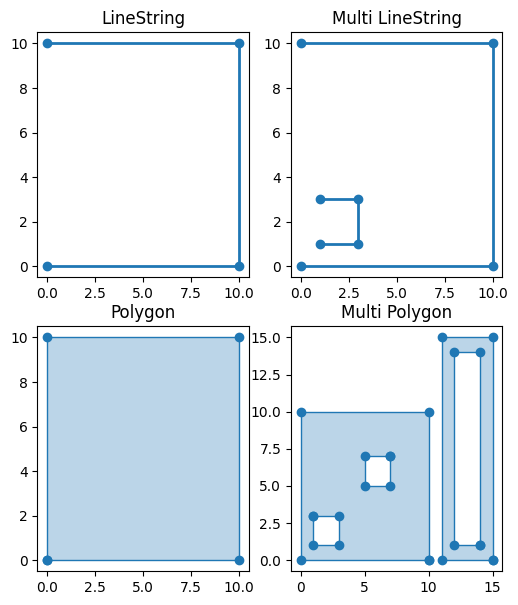

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 7))

ax[0, 0].set_title('LineString')
plot_line(line, ax=ax[0, 0])
ax[0, 1].set_title('Multi LineString')
plot_line(multi_line, ax=ax[0, 1])
ax[1, 0].set_title('Polygon')
plot_polygon(poly, ax=ax[1, 0])
ax[1, 1].set_title('Multi Polygon')
plot_polygon(multi_poly, ax=ax[1, 1]);

### 引数による戻り値の違い

In [26]:
geom_disassembly(line, 'point')

[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>]

In [27]:
geom_disassembly(line, 'xyz')

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0)]

In [28]:
geom_disassembly(line, 'x_y_z')

[[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 10.0, 10.0], [None, None, None, None]]

各geometryを分解

In [29]:
geom_disassembly(points, 'point')

[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>]

In [30]:
geom_disassembly(line, 'point')

[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>]

In [31]:
geom_disassembly(multi_line, 'point')

[[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>],
 [<POINT (1 1)>, <POINT (3 1)>, <POINT (3 3)>, <POINT (1 3)>]]

In [32]:
geom_disassembly(poly, 'point')

[<POINT (0 0)>, <POINT (10 0)>, <POINT (10 10)>, <POINT (0 10)>, <POINT (0 0)>]

In [33]:
geom_disassembly(multi_poly, 'point')

[[<POINT (10 0)>,
  <POINT (0 0)>,
  <POINT (0 10)>,
  <POINT (10 10)>,
  <POINT (10 0)>],
 [<POINT (15 0)>,
  <POINT (11 0)>,
  <POINT (11 15)>,
  <POINT (15 15)>,
  <POINT (15 0)>]]

In [34]:
geoms = multi_poly

In [43]:
# OuterのPolygon数を数える
for i in range(shapely.get_num_geometries(multi_poly)):
    # Polygonをindexで取得
    poly = shapely.get_geometry(multi_poly, i)
    # OuterのPolygonを取得
    outer_ring = shapely.get_exterior_ring(poly)
    # Innerの数を数える
    inner_count = shapely.get_num_interior_rings(poly)
    inner_rings = []
    if 1 <= inner_count:
        for i in range(inner_count):
            inner_ring = shapely.get_interior_ring(poly, i)
            inner_rings.append(inner_ring)
    break
    

(<matplotlib.patches.PathPatch at 0x210323c9f90>,
 <matplotlib.lines.Line2D at 0x210323ca410>)

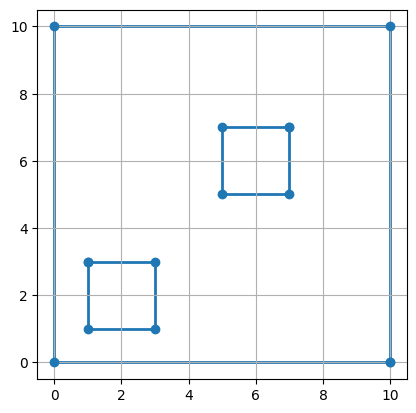

In [51]:
plot_line(outer_ring)
plot_line(inner_rings[0])
plot_line(inner_rings[1])